# Imports

In [1]:
%pip install tensorflow==2.16.1 --quiet

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib

In [3]:
tf.__version__, np.__version__, matplotlib.__version__

('2.16.1', '1.26.4', '3.8.0')

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import utils as keras_utils
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import matplotlib.pyplot as plt

# Database

## Download the databased

In [5]:
(x_train, y_train), (x_test, y_test) =  mnist.load_data()
print(f"""
  null values:
  x_train: {np.isnan(x_train).sum()}
  y_train: {np.isnan(y_train).sum()}
  x_test: {np.isnan(x_test).sum()}
  y_test: {np.isnan(y_test).sum()}    
  
  Shapes:
  x_train: {x_train.shape}
  y_train: {y_train.shape}
  x_test: {x_test.shape}
  y_test: {y_test.shape}
  
  Max/Min values:
  x_train: {x_train.max()}\{x_train.min()}
  y_train: {y_train.max()}\{y_train.min()}
  x_test: {x_test.max()}\{x_test.min()}
  y_test: {y_test.max()}\{y_test.min()}
""")


  null values:
  x_train: 0
  y_train: 0
  x_test: 0
  y_test: 0    
  
  Shapes:
  x_train: (60000, 28, 28)
  y_train: (60000,)
  x_test: (10000, 28, 28)
  y_test: (10000,)
  
  Max/Min values:
  x_train: 255\0
  y_train: 9\0
  x_test: 255\0
  y_test: 9\0



## Preprocessing

### Normalization

In [6]:
x_train, x_test = x_train / x_train[0].max(), x_test / x_test[0].max()
print(f"Min/Max: x_train={x_train[0].max()}/{x_train[0].min()}, x_test={x_test[0].max()}/{x_test[0].min()}")

Min/Max: x_train=1.0/0.0, x_test=1.0/0.0


### Train-test flatten

In [7]:
x_train_flatten = x_train.reshape(-1, np.prod(x_train.shape[1:]))
x_test_flatten = x_test.reshape(-1, np.prod(x_test.shape[1:]))
x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

### test categories

In [8]:
y_train, y_test = keras_utils.to_categorical(y_train), keras_utils.to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# Visualizing Image Dimensionality Reduction

## Building and Training the Model

In [9]:
autoencoder_falleng = Sequential()
autoencoder_falleng.add(Input(shape=(x_train_flatten.shape[1],)))
autoencoder_falleng.add(Dense(128, activation='relu'))
autoencoder_falleng.add(Dense(x_train_flatten.shape[1], activation='sigmoid'))
autoencoder_falleng.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
csv_logger_autoencor_falleng = CSVLogger('csv_logger_autoencor_falleng.csv', append=False)
autoencoder_falleng.fit(x_train_flatten, x_train_flatten, epochs=50, batch_size=256, verbose=0, callbacks=[csv_logger_autoencor_falleng]);

In [11]:
img_flatten = Input(shape=(x_train_flatten.shape[1],))
img_encoded_flatten = Input(shape=(128,))
encoder_flatting = Model(img_flatten, autoencoder_falleng.layers[0](img_flatten))
decoder_flatting = Model(img_encoded_flatten, autoencoder_falleng.layers[-1](img_encoded_flatten))

## Predictions

In [12]:
imgs_encoded_flatting = encoder_flatting.predict(x_test_flatten)
imgs_decoded_flatting = decoder_flatting.predict(imgs_encoded_flatting)
imgs_encoded_flatting.shape, imgs_decoded_flatting.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


((10000, 128), (10000, 784))

## Visualizing the Results

Encoded size: 4.88 MB -> Predicted size: 29.91 MB. Reduction size: 25.02 MB
Percentage reduction: 83.67%
Similarity percentage: 98.78%


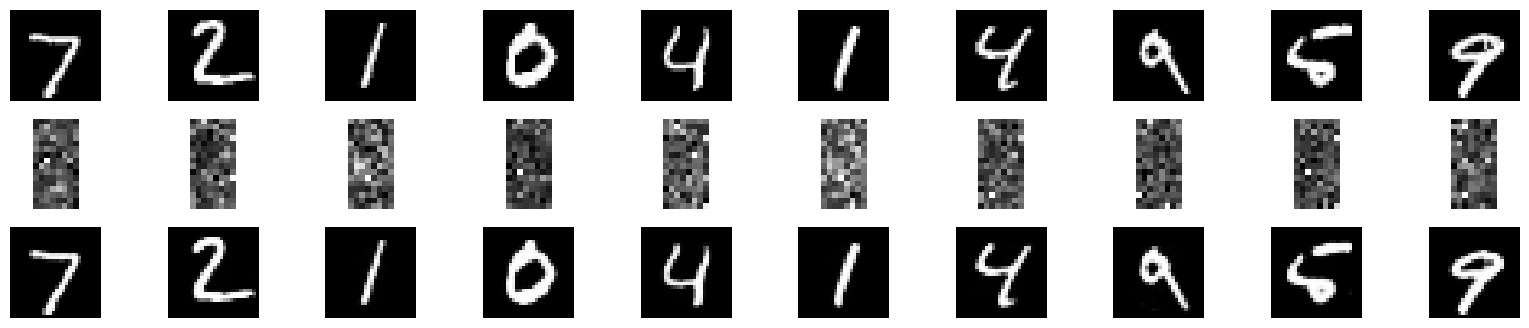

In [13]:
size_encoded = imgs_encoded_flatting.__sizeof__()
size_pred = imgs_decoded_flatting.__sizeof__()
size_encoded_mb = size_encoded / 1024 / 1024
size_pred_mb = size_pred / 1024 / 1024
reduction_size = abs(size_encoded_mb - size_pred_mb)
reduction_rate = size_pred_mb / size_encoded_mb
percentage_reduction = (1 - (size_encoded_mb / size_pred_mb)) * 100
mean_diff = np.mean(np.abs(x_test_flatten - imgs_decoded_flatting))
similarity_percentage = (1 - mean_diff) * 100

print(f"Encoded size: {size_encoded_mb:.2f} MB -> Predicted size: {size_pred_mb:.2f} MB. Reduction size: {reduction_size:.2f} MB")
print(f"Percentage reduction: {percentage_reduction:.2f}%")
print(f"Similarity percentage: {similarity_percentage:.2f}%")

QTD_IMGS = 10
plt.figure(figsize=(20, 4))
for i in range(QTD_IMGS):
  # Original images
  plt.subplot(3, QTD_IMGS, i + 1)
  plt.imshow(x_test[i], cmap='gray')
  plt.axis('off')
  
  # Encoded images
  plt.subplot(3, QTD_IMGS, i + QTD_IMGS + 1)
  plt.imshow(imgs_encoded_flatting[i].reshape(16, 8), cmap='gray')
  plt.axis('off')
  
  # Reconstructed images
  plt.subplot(3, QTD_IMGS, i + 2 * QTD_IMGS + 1)
  plt.imshow(imgs_decoded_flatting[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  
plt.show()

# Visualizing Image Dimensionality Reduction - Categorical

## Building and Training the Model

In [14]:
autoencoder_falleng_2 = Sequential()
autoencoder_falleng_2.add(Input(shape=(x_train_flatten.shape[1],)))
autoencoder_falleng_2.add(Dense(32, activation='relu'))
autoencoder_falleng_2.add(Dense(x_train_flatten.shape[1], activation='sigmoid'))
autoencoder_falleng_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
csv_logger_autoencor_falleng_2 = CSVLogger('csv_logger_autoencor_falleng_2.csv', append=False)
autoencoder_falleng_2.fit(x_train_flatten, x_train_flatten, epochs=50, batch_size=256, verbose=0, callbacks=[csv_logger_autoencor_falleng_2]);

In [16]:
img_flatten_2 = Input(shape=(x_train_flatten.shape[1],))
img_encoded_flatten_2 = Input(shape=(32,))
encoder_flatting_2 = Model(img_flatten_2, autoencoder_falleng_2.layers[0](img_flatten_2))
decoder_flatting_2 = Model(img_encoded_flatten_2, autoencoder_falleng_2.layers[-1](img_encoded_flatten_2))

## Predictions

In [17]:
imgs_encoded_train_flatting_2 = encoder_flatting_2.predict(x_train_flatten)
imgs_encoded_test_flatting_2 = encoder_flatting_2.predict(x_test_flatten)
imgs_encoded_train_flatting_2.shape, imgs_encoded_test_flatting_2.shape

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


((60000, 32), (10000, 32))

In [18]:
imgs_decoded_train_flatting_2 = decoder_flatting_2.predict(imgs_encoded_train_flatting_2)
imgs_decoded_test_flatting_2 = decoder_flatting_2.predict(imgs_encoded_test_flatting_2)
imgs_decoded_train_flatting_2.shape, imgs_decoded_test_flatting_2.shape

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


((60000, 784), (10000, 784))

## Visualizing the Results

In [21]:
size_encoded = imgs_encoded_test_flatting_2.__sizeof__()
size_pred = imgs_decoded_test_flatting_2.__sizeof__()
size_encoded_mb = size_encoded / 1024 / 1024
size_pred_mb = size_pred / 1024 / 1024
reduction_size = abs(size_encoded_mb - size_pred_mb)
reduction_rate = size_pred_mb / size_encoded_mb
percentage_reduction = (1 - (size_encoded_mb / size_pred_mb)) * 100
mean_diff = np.mean(np.abs(x_test_flatten - imgs_decoded_test_flatting_2))
similarity_percentage = (1 - mean_diff) * 100

print(f"Encoded size: {size_encoded_mb:.2f} MB -> Predicted size: {size_pred_mb:.2f} MB. Reduction size: {reduction_size:.2f} MB")
print(f"Percentage reduction: {percentage_reduction:.2f}%")
print(f"Similarity percentage: {similarity_percentage:.2f}%")

Encoded size: 1.22 MB -> Predicted size: 29.91 MB. Reduction size: 28.69 MB
Percentage reduction: 95.92%
Similarity percentage: 96.68%
